In [17]:
import random
import numpy as np
import matplotlib.pyplot as plt

from nn import Value
from nn import Neuron, Layer, MLP
import nn

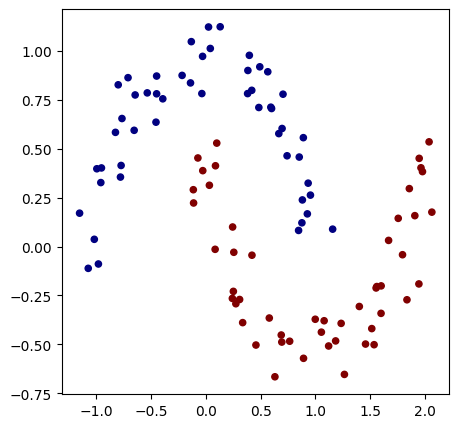

In [18]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.1, random_state=40)

# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [19]:
model = MLP(2, [16, 16, 1], out_activation='sigm') # 2-layer neural network
print(model.layers)
print("number of parameters", len(model.parameters()))

[Layer(nin=2,nout=16,activation=relu), Layer(nin=16,nout=16,activation=relu), Layer(nin=16,nout=1,activation=sigm)]
number of parameters 337


In [20]:
learning_rate = 0.05
epochs = 200

history_loss = nn.train_GD(nn.binary_cross_entropy_loss, model, X, y, epochs, learning_rate)

Epoch 1/200 | Loss: 2.18762
Epoch 2/200 | Loss: 1.11873
Epoch 3/200 | Loss: 0.88520
Epoch 4/200 | Loss: 0.81874
Epoch 5/200 | Loss: 0.77764
Epoch 6/200 | Loss: 0.74643
Epoch 7/200 | Loss: 0.72173
Epoch 8/200 | Loss: 0.70042
Epoch 9/200 | Loss: 0.68206
Epoch 10/200 | Loss: 0.66558
Epoch 11/200 | Loss: 0.65008
Epoch 12/200 | Loss: 0.63571
Epoch 13/200 | Loss: 0.62230
Epoch 14/200 | Loss: 0.60945
Epoch 15/200 | Loss: 0.59734
Epoch 16/200 | Loss: 0.58542
Epoch 17/200 | Loss: 0.57385
Epoch 18/200 | Loss: 0.56301
Epoch 19/200 | Loss: 0.55285
Epoch 20/200 | Loss: 0.54318
Epoch 21/200 | Loss: 0.53370
Epoch 22/200 | Loss: 0.52500
Epoch 23/200 | Loss: 0.51664
Epoch 24/200 | Loss: 0.50901
Epoch 25/200 | Loss: 0.50222
Epoch 26/200 | Loss: 0.49593
Epoch 27/200 | Loss: 0.48992
Epoch 28/200 | Loss: 0.48438
Epoch 29/200 | Loss: 0.47910
Epoch 30/200 | Loss: 0.47394
Epoch 31/200 | Loss: 0.46896
Epoch 32/200 | Loss: 0.46388
Epoch 33/200 | Loss: 0.45891
Epoch 34/200 | Loss: 0.45402
Epoch 35/200 | Loss: 0.

(-1.665388933533515, 2.084611066466485)

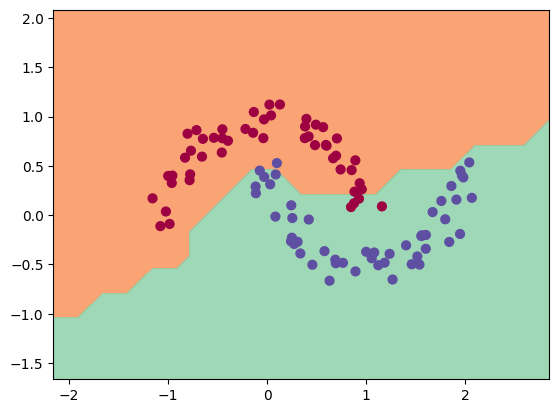

In [22]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0.5 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())